In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df =pd.read_csv('uber.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'uber.csv'

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [ ]:
from sklearn.impute import SimpleImputer

numeric_columns=df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns]=imputer.fit_transform(df[numeric_columns])

In [ ]:
df.dropna(subset=['fare_amount'],inplace=True)

In [ ]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['hour']=df['pickup_datetime'].dt.hour

In [ ]:
df.year

0         2015
1         2009
2         2009
3         2009
4         2014
          ... 
199995    2012
199996    2014
199997    2009
199998    2015
199999    2010
Name: year, Length: 200000, dtype: int32

In [ ]:
df.drop(columns=['pickup_datetime','key'],inplace=True)

In [ ]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,24238194.0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,19
1,27835199.0,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,20
2,44984355.0,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,21
3,25894730.0,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,8
4,17610152.0,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,2014,8,28,17


In [ ]:
corr_matrix=df.corr()

In [ ]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

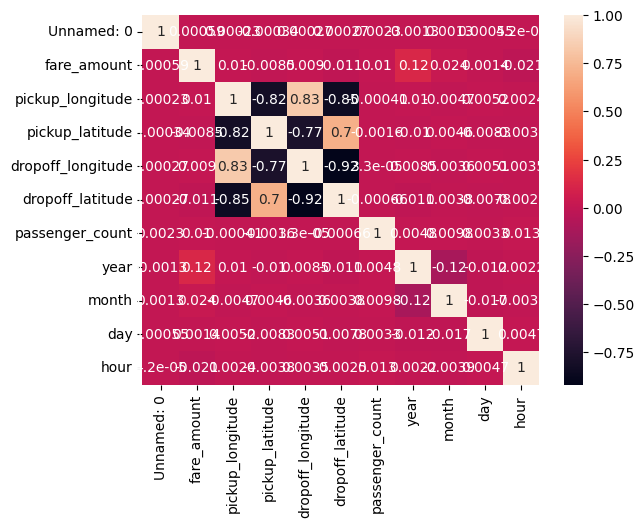

In [ ]:

sns.heatmap(corr_matrix,annot=True)

In [ ]:
plt.show()

In [ ]:
X=df.drop(columns=['fare_amount'])
y=df['fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


r2_lr = r2_score(y_test, y_pred_lr)


rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


In [ ]:
r2_rf=r2_score(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))

In [ ]:
print(f"Linear Regression - R²: {r2_lr}, RMSE: {rmse_lr}")

print(f"Random Forest Regression - R²: {r2_rf}, RMSE: {rmse_rf}")

Linear Regression - R²: 0.016110270874322374, RMSE: 10.227812844812462
Random Forest Regression - R²: 0.7286364710917996, RMSE: 5.371372830729891
